# Create maps

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import numpy as np
import cmocean

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.path as mpath
import matplotlib
import matplotlib.colors as colors

%matplotlib inline

Load mesh file:

In [2]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
lon        = np.array(mesh.variables['nav_lon'])
lat        = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])
tmask      = np.array(mesh.variables['tmask'])
land_mask  = np.ma.masked_where((tmask[0,:,:,:] > 0.1) , tmask[0,:,:,:]) 

In [20]:
land_color         = '#a9a7a2'
land_outline_color = '#373736'
light_color = '#d0d0cf'
land_edge = '#929291'

### Maps

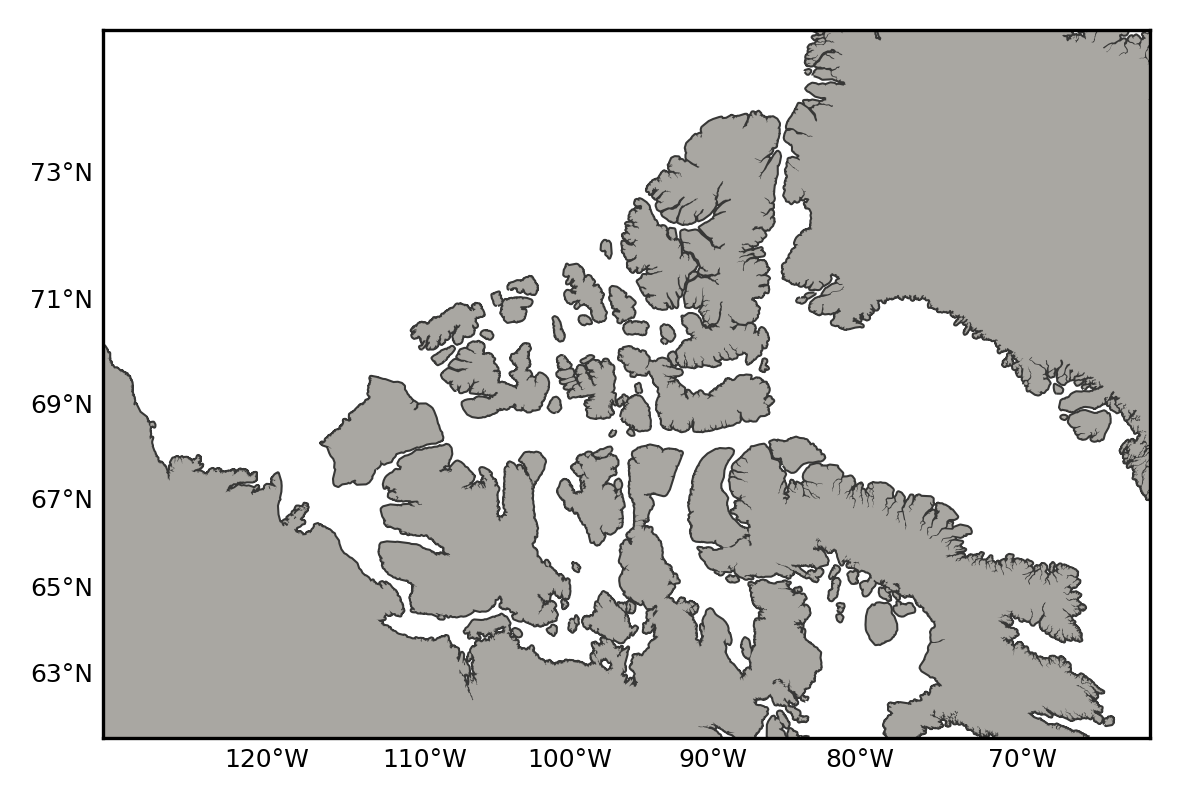

In [8]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 76, lon_0 = -96, resolution='i', width=3.4e6, height=2.3e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=6)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=6)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

Text(0, 0.5, 'Ocean depth [m]')

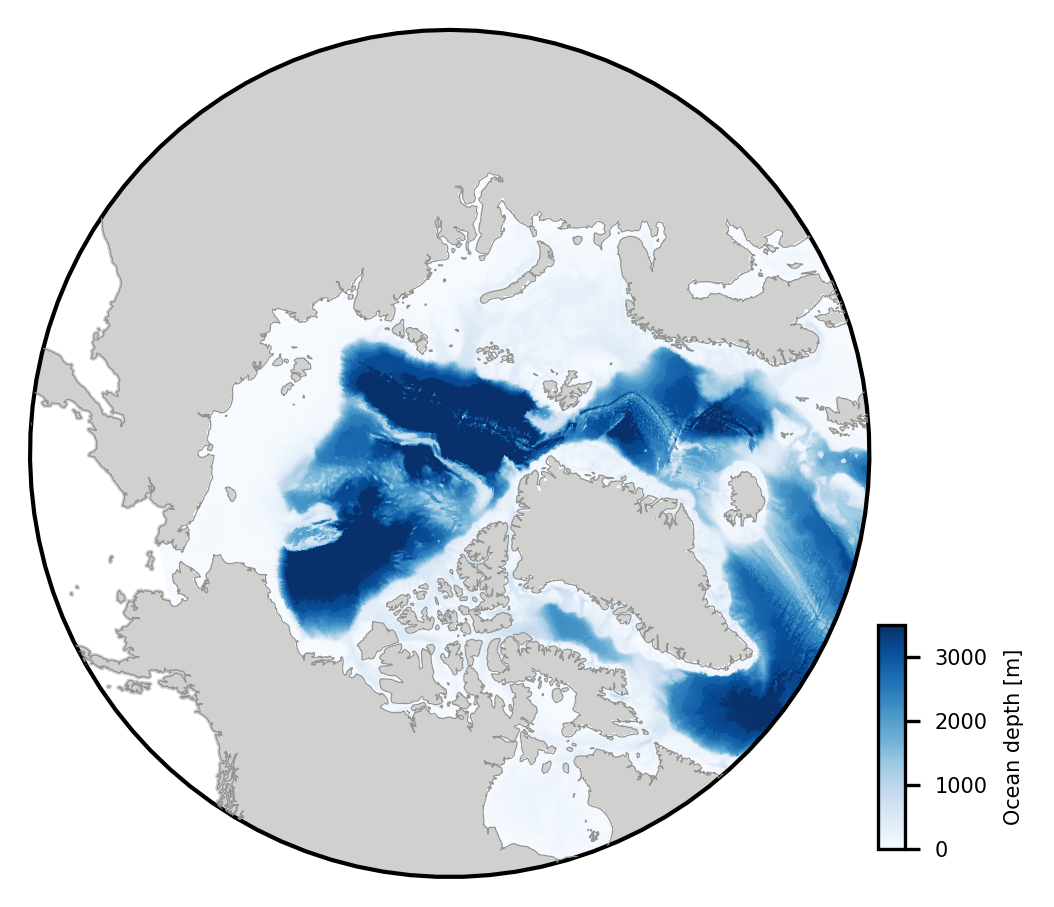

In [6]:
fig = plt.figure(figsize=(4.5,3.74), dpi=300)
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo(central_longitude=-100))

ax.set_extent([-180, 180, 55, 90], crs=ccrs.PlateCarree())
ax.add_feature(feature.LAND.with_scale("50m"), color=light_color) #land_50m)
# ax.add_feature(feature.OCEAN.with_scale("50m"))
ax.coastlines(resolution='50m', linewidth=0.3, color=land_edge, zorder=3)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

bathy_var = np.ma.masked_where(mesh_bathy < 0.1, mesh_bathy)
p1 = ax.pcolormesh(lon, lat, bathy_var, cmap=matplotlib.cm.get_cmap('Blues'), vmin=0, vmax=3500, transform=ccrs.PlateCarree())
ax_cb = plt.axes([0.83, 0.15, 0.02, 0.2])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical')
cb.ax.tick_params(labelsize=5)
cb.ax.set_ylabel('Ocean depth [m]', fontsize=5)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/thesis_ArcticOcean_map.jpg', bbox_inches='tight', dpi=300)

In [35]:
coastline_fine   = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor=land_edge, linewidth=0.25, facecolor=light_color)

In [68]:
print(bathy_var.min(), bathy_var.max())

9.347767 5398.138


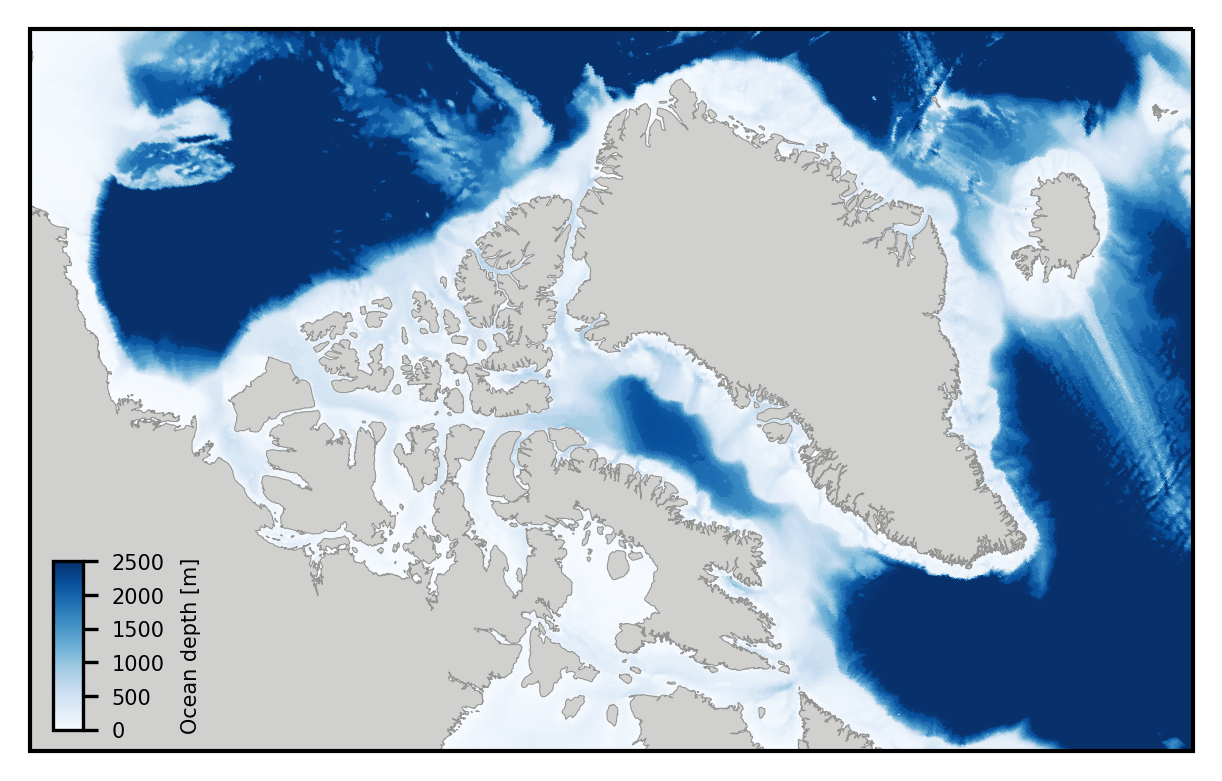

In [77]:
fig, ax = plt.subplots(figsize=(5, 3.74), dpi=300, subplot_kw={"projection": cartopy.crs.NorthPolarStereo(central_longitude=-91)})

ax.add_feature(coastline_fine)
bathy_var = np.ma.masked_where(mesh_bathy < 0.1, mesh_bathy)
p1 = ax.pcolormesh(lon, lat, bathy_var, cmap=matplotlib.cm.get_cmap('Blues'), vmin=0, vmax=2500, transform=ccrs.PlateCarree())
# p1 = ax.pcolormesh(lon, lat, bathy_var, cmap=matplotlib.cm.get_cmap('Blues'), \
#                    norm=colors.LogNorm(vmin=bathy_var.min(), vmax=1500), transform=ccrs.PlateCarree())
# ax.set_extent([-130, -10, 70, 135], cartopy.crs.Miller(central_longitude=0))
ax.set_extent([-130, 0, 70, 70], cartopy.crs.Miller(central_longitude=0))

ax_cb = plt.axes([0.14, 0.20, 0.02, 0.15])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical', ticks=[0,500,1000,1500,2000,2500])
cb.ax.tick_params(labelsize=5)
cb.ax.set_ylabel('Ocean depth [m]', fontsize=5)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/thesis_CAA_map.jpg', bbox_inches='tight', dpi=300)

Text(0, 0.5, 'Ocean depth [m]')

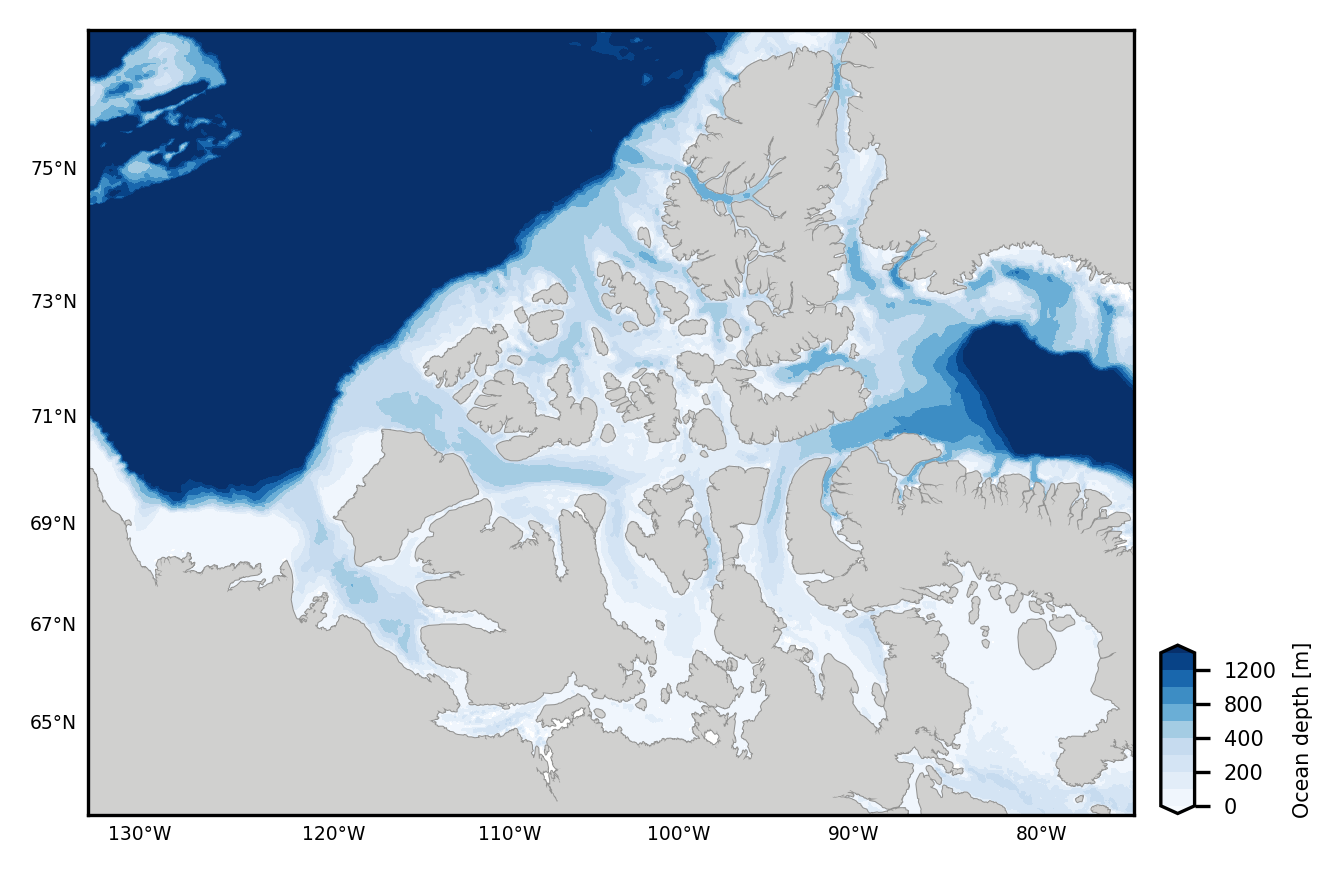

In [128]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74*1.5), dpi=300)

proj1 = Basemap(projection='stere', lat_0 = 75.5, lon_0 = -104, resolution='i', width=2.8e6, height=2.1e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=4.5)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=4.5)
proj1.drawcoastlines(color=land_edge, linewidth=0.5)
proj1.fillcontinents(color=light_color, lake_color=light_color, zorder=2);

x, y = proj1(lon,lat)
# proj1.pcolormesh(x, y, bathy_var, cmap=matplotlib.cm.get_cmap('Blues'), vmin=0, vmax=1000)
p1 = proj1.contourf(x, y, bathy_var, cmap=matplotlib.cm.get_cmap('Blues'), vmin=0, vmax=1400, \
               levels=[0,100,200,300,400,600,800,1000,1200,1400], extend='both')

ax_cb = plt.axes([0.92, 0.27, 0.025, 0.1])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical', ticks=[0,200,400,800,1200])
cb.ax.tick_params(labelsize=5)
cb.ax.set_ylabel('Ocean depth [m]', fontsize=5)
# proj1.pcolormesh(x, y, bathy_var, cmap=matplotlib.cm.get_cmap('Blues'), norm=colors.LogNorm(vmin=bathy_var.min(), vmax=1000))